In [32]:
#import the packages:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras import initializers

In [33]:
image_path = "/Users/wangyingqi/Desktop/Tom and Jerry/tom_and_jerry/tom_and_jerry"

#create dataset of training
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    image_path ,
    labels = "inferred",
    label_mode = "int",
    batch_size =32,
    image_size =(128,128),
    shuffle = True,
    seed = 123,
    validation_split = 0.2,
    subset = "training",
)
#create dataset of validing
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    image_path ,
    labels = "inferred",
    label_mode = "int",
    batch_size =32,
    image_size =(128,128),
    shuffle = True,
    seed = 123,
    validation_split = 0.2,
    subset = "validation",
)




Found 5478 files belonging to 4 classes.
Using 4383 files for training.
Found 5478 files belonging to 4 classes.
Using 1095 files for validation.


In [96]:
#build the model of CNN:
input_size=(128,128,3)
nor_lay = tf.keras.laye5rs.Rescaling(1./255,input_shape =input_size)

model = Sequential()
model.add(nor_lay)
model.add(layers. SeparableConv2D(filters =32,kernel_size = (3,3),strides =2,activation ='relu',padding = 'same',depth_multiplier=1))
model.add(layers.MaxPooling2D(pool_size = (3,3),strides = 2,padding = 'same'))
model.add(layers. SeparableConv2D(filters =32,kernel_size = (3,3),strides =2,activation ='relu',padding = 'same',depth_multiplier=1))
model.add(layers.MaxPooling2D(pool_size = (3,3),strides = 2,padding = 'same'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units = 64,activation ='relu'))
model.add(layers.Dense(units =4,kernel_initializer =initializers.random_normal(stddev=0.01),activation ='softmax'))
    
model.compile(optimizer= tf.optimizers.Adam(learning_rate =0.01),
              loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics = 'accuracy',
             )

epoch_num = 25
history = model.fit(train_ds,validation_data = test_ds,epochs = epoch_num)



Epoch 1/25
137/137 [==============================] - 7s 50ms/step - loss: 1.3443 - accuracy: 0.3415 - val_loss: 1.3155 - val_accuracy: 0.3863
Epoch 2/25
137/137 [==============================] - 7s 52ms/step - loss: 1.2118 - accuracy: 0.4565 - val_loss: 1.0869 - val_accuracy: 0.4941
Epoch 3/25
137/137 [==============================] - 8s 53ms/step - loss: 1.0469 - accuracy: 0.5558 - val_loss: 1.0455 - val_accuracy: 0.5753
Epoch 4/25
137/137 [==============================] - 8s 55ms/step - loss: 0.9503 - accuracy: 0.5991 - val_loss: 0.9613 - val_accuracy: 0.6155
Epoch 5/25
137/137 [==============================] - 8s 57ms/step - loss: 0.8836 - accuracy: 0.6407 - val_loss: 0.9258 - val_accuracy: 0.6311
Epoch 6/25
137/137 [==============================] - 8s 55ms/step - loss: 0.7875 - accuracy: 0.6742 - val_loss: 0.8803 - val_accuracy: 0.6630
Epoch 7/25
137/137 [==============================] - 8s 54ms/step - loss: 0.7349 - accuracy: 0.7086 - val_loss: 0.8767 - val_accuracy: 0.6548

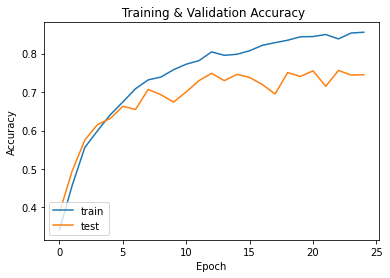

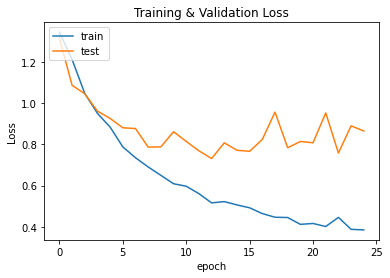

In [97]:
#make the image of the accuracy & loss of training and validation
#model compile first

plt.plot(range(epoch_num),history.history['accuracy'])
plt.plot(range(epoch_num),history.history['val_accuracy'])
plt.title(' Training & Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower left') 
plt.show()


plt.plot(range(epoch_num),history.history['loss'])
plt.plot(range(epoch_num),history.history['val_loss'])
plt.title('Training & Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [100]:
input_size=(128,128,3)
nor_lay = tf.keras.layers.Rescaling(1./255,input_shape =input_size)

model = Sequential()
model.add(nor_lay)
model.add(layers. SeparableConv2D(filters =32,kernel_size = (3,3),strides =2,activation ='relu',padding = 'same',depth_multiplier=1))
model.add(layers.MaxPooling2D(pool_size = (3,3),strides = 2,padding = 'same'))
model.add(layers.Dropout(0.2))
model.add(layers. SeparableConv2D(filters =32,kernel_size = (3,3),strides =2,activation ='relu',padding = 'same',depth_multiplier=1))
model.add(layers.MaxPooling2D(pool_size = (3,3),strides = 2,padding = 'same'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units = 64,activation ='relu'))
model.add(layers.Dense(units =4,kernel_initializer =initializers.random_normal(stddev=0.01),activation ='softmax'))
    
model.compile(optimizer= tf.optimizers.Adam(learning_rate =0.001),
              loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics = 'accuracy',
             )

epoch_num = 100
history = model.fit(train_ds,validation_data = test_ds,epochs = epoch_num)


Epoch 1/100
137/137 [==============================] - 8s 55ms/step - loss: 1.3442 - accuracy: 0.3488 - val_loss: 1.3301 - val_accuracy: 0.3653
Epoch 2/100
137/137 [==============================] - 8s 55ms/step - loss: 1.3222 - accuracy: 0.3589 - val_loss: 1.2929 - val_accuracy: 0.4192
Epoch 3/100
137/137 [==============================] - 8s 57ms/step - loss: 1.2520 - accuracy: 0.4337 - val_loss: 1.2404 - val_accuracy: 0.4100
Epoch 4/100
137/137 [==============================] - 8s 58ms/step - loss: 1.1351 - accuracy: 0.5090 - val_loss: 1.0355 - val_accuracy: 0.5653
Epoch 5/100
137/137 [==============================] - 8s 59ms/step - loss: 1.0121 - accuracy: 0.5838 - val_loss: 0.9428 - val_accuracy: 0.6100
Epoch 6/100
137/137 [==============================] - 8s 59ms/step - loss: 0.9445 - accuracy: 0.6158 - val_loss: 0.8755 - val_accuracy: 0.6548
Epoch 7/100
137/137 [==============================] - 8s 59ms/step - loss: 0.8775 - accuracy: 0.6539 - val_loss: 0.8464 - val_accuracy:

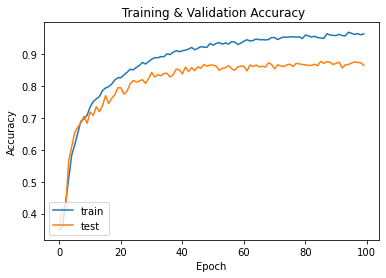

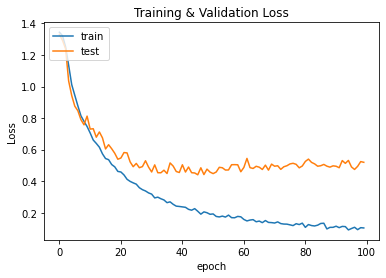

In [101]:
plt.plot(range(epoch_num),history.history['accuracy'])
plt.plot(range(epoch_num),history.history['val_accuracy'])
plt.title(' Training & Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower left') 
plt.show()


plt.plot(range(epoch_num),history.history['loss'])
plt.plot(range(epoch_num),history.history['val_loss'])
plt.title('Training & Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [102]:
#model.summary:
model.save('m.h5')
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_24 (Rescaling)    (None, 128, 128, 3)       0         
                                                                 
 separable_conv2d_6 (Separab  (None, 64, 64, 32)       155       
 leConv2D)                                                       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_56 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 separable_conv2d_7 (Separab  (None, 16, 16, 32)       1344      
 leConv2D)                                                       
                                                     

In [103]:
# Q4:evaluate the test data:
print('    Evaluate on test data:   ')
result = model.evaluate(test_ds, verbose=1)
print("test loss & test acc :",result)


    Evaluate on test data:   
35/35 [==============================] - 1s 23ms/step - loss: 0.5196 - accuracy: 0.8648
test loss & test acc : [0.5195709466934204, 0.8648402094841003]


In [104]:
#Q5:predict the test data:
print("Predict on test data")
prediction = model.predict(test_ds,verbose =1)
l = len(prediction)
print(l)
print(prediction)

Predict on test data
35/35 [==============================] - 1s 23ms/step
1095
[[9.4212782e-01 4.7846473e-04 5.1616821e-02 5.7768626e-03]
 [9.8008686e-06 9.9998522e-01 3.0615247e-06 1.8585951e-06]
 [1.4719586e-01 2.6710596e-04 8.5239762e-01 1.3934681e-04]
 ...
 [1.1376528e-07 9.9895787e-01 9.6456148e-04 7.7445213e-05]
 [2.2560569e-02 4.4160625e-01 1.7993765e-02 5.1783937e-01]
 [9.9771857e-01 6.4105721e-09 4.5359274e-04 1.8277861e-03]]


In [105]:
prediction_list=[]
for i in prediction:
    t = np.array(i)
    mid = np.argmax(t)
    prediction_list.append(mid)
print(len(prediction_list))

1095


1095
0-->jerry
1-->tom
2-->tom_jerry_0
3-->tom_jerry_1


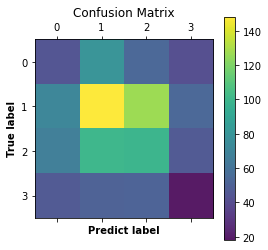

In [107]:
test_ds_list = []
test_labels =  np.array([])
for x, y in test_ds:
    test_labels = np.concatenate([test_labels, y.numpy()])
test_labels.shape
print(len(test_labels))
for i in test_labels:
    test_ds_list.append(i)


#make the confusion matrix:
print("0-->jerry")
print("1-->tom")
print("2-->tom_jerry_0")
print("3-->tom_jerry_1")
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_ds_list,prediction_list)
plt.matshow(matrix,alpha = 0.9)
plt.colorbar()
plt.ylabel("True label",fontweight='bold')
plt.xlabel("Predict label",fontweight='bold')
plt.title("Confusion Matrix")
plt.show()

